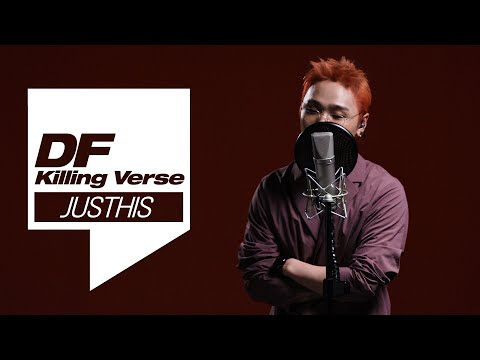

In [1]:
from IPython.display import YouTubeVideo
disp = YouTubeVideo('iMTblJbmam4')
display(disp)

### 합성곱
* 인공신경망은 처음에 가중치와 절편을 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 이용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다
-> 모델훈련

* 합성곱은 밀집층의 계산과 조금 다르다.

* 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱함

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3,3), activation = 'relu') # 필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수


C:\Users\kyeongtae\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타냄.
- 보통 커널의 크기는 (3,3) 이나 (5,5)크기가 권장됨

### <패딩과 스트라이드>
- 앞에서는 (4,4)크기의 입력에 (3,3)크기의 커널을 적용하여 (2,2)크기의 특성 맵을 생성했음
- 만약 커널 크기는 (3,3)으로 두고 출력크기를 (4,4)로 만들려면??
  - 마치 더 큰 입력에 합성곱하는 척해야 한다
  * 패딩 : 입력 배열의 주위를 가상의 원소로 채우는 것 -> 이미지 주변의 정보를 잃어버리지 않도록 도와줌
      * 보통 0으로 채움(세임 패딩)
      * 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우
          * 밸리드 패딩의 경우에는 모서리의 이미지를 반영하지 못할 가능성이 높음
  * 스트라이드 : 커널이 이동하는 크기(default : 1)
  * 풀링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행함(특성맵의 개수는 줄이지 않음)
      * 최대 풀링, 평균 풀링 : 각 영역에서 최대 선택, 평균 선택
      * 풀링은 패딩을 하지 않는다

In [3]:
keras.layers.Conv2D(10, kernel_size = (3,3), activation = 'relu', padding = 'same')
keras.layers.MaxPooling2D(2, strides = 2, padding = 'valid')

In [4]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

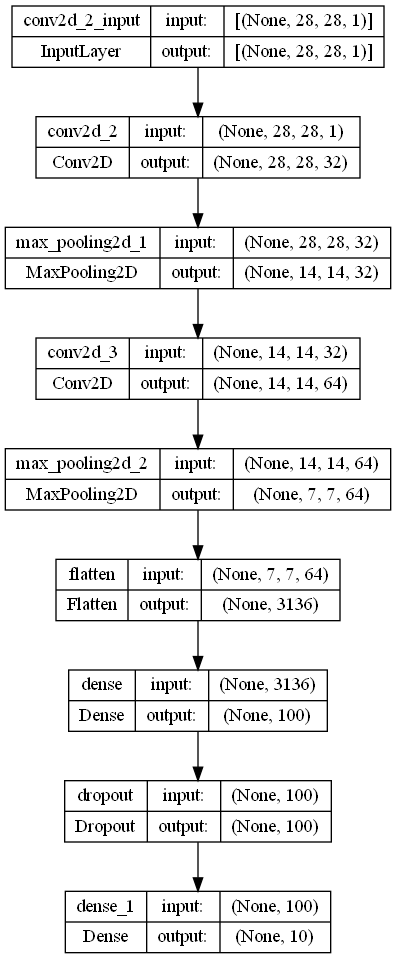

In [8]:
keras.utils.plot_model(model, show_shapes = True)

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)


In [ ]:
history = model.fit(train_scaled, train_target, epochs = 10, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/10
